In [1]:
%matplotlib inline
%load_ext autoreload
import numpy as np
import pandas as pd
import scipy as sp
import scipy.io
import datetime
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import normalize
from sklearn.utils import shuffle

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
import loader
import neuralnet
%aimport neuralnet
%aimport loader
%aimport

Modules to reload:
loader neuralnet

Modules to skip:



In [3]:
import loader

In [4]:
def squared_error(y, y_hat):
    return (y - y_hat).dot((y - y_hat))

def squared_error_prime(y, y_hat):
    return -1 * (y - y_hat)

def cross_ent(y, y_hat):
    part1 = y.dot(np.log(y_hat))
    part2 = (1.0 - y).dot(np.nan_to_num(np.log(1.0 - y_hat)))
    return -(part1 + part2)

def cross_ent_prime(y, y_hat):
    part1 = y / y_hat
    part2 = (1 - y)/(1 - y_hat)
    return -(part1 - part2)
    
def t(z):
    return np.tanh(z)

def t_prime(z):
    return 1 - np.power(t(z), 2)

def g(z):
    return (1.0 / (1.0 + np.exp(-z)))

def g_prime(z):
    return g(z) * (1 - g(z))

In [6]:
%autoreload
xy = loader.XY19()

training w2v
starting X
starting X test
starting TFIDF
now just transforming
DONE!


In [7]:
X1 = xy['X_train']
y1 = xy['y_train']
y = pd.get_dummies(y1).values
XVal1 = xy['X_val']
yVal = xy['y_val']
yVal = pd.get_dummies(yVal).values

In [8]:
X = X1.toarray()
XVal = XVal1.toarray()
from sklearn.preprocessing import normalize
X = normalize(X)
XVal = normalize(XVal)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the normalize function.
  warnings.warn(msg, DataConversionWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the normalize function.
  warnings.warn(msg, DataConversionWarning)


Total Train Time 51.84 Seconds
Parameters used {'score_every': 10000, 'eta': 0.05, 'end': datetime.datetime(2015, 12, 11, 12, 28, 51, 655897), 'start': datetime.datetime(2015, 12, 11, 12, 27, 59, 812584), 'num_iters': 50000}
Training Accuracy 0.536889690223
Validation Accuracy 0.533054611968


/Users/bill_chambers/AeroFS/Dev/mlproject/walmart/neuralnet.py:120: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if XVal != None:


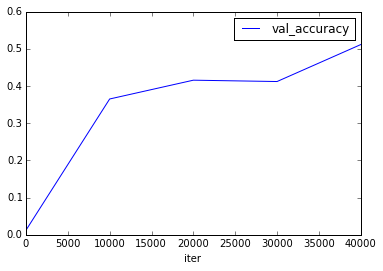

In [9]:
%autoreload
input_dim = len(X[0])
output_dim = len(y[0])
hl_size = 150

layer1 = neuralnet.Layer((input_dim, hl_size), t, t_prime)
layer2 = neuralnet.OutputLayer((hl_size, output_dim), g, g_prime)
nn = neuralnet.NeuralNet(layer1, layer2, cross_ent, cross_ent_prime)
nn.train(X, y, num_iters=50000, score_every=10000, eta=0.05, XVal=XVal, yVal=yVal)
print("Parameters used", nn.train_params)
nn.resulting_scores()[['val_accuracy', 'iter']].plot(x='iter')
print("Training Accuracy", nn.score(X,y)/len(X))
print("Validation Accuracy", nn.score(XVal,yVal)/len(XVal))

In [10]:
nn.cache_layers("layers.pkl")

Total Train Time 405.55 Seconds
Parameters used {'score_every': 170000, 'eta': 0.01, 'end': datetime.datetime(2015, 12, 11, 12, 38, 3, 955832), 'start': datetime.datetime(2015, 12, 11, 12, 31, 18, 404501), 'num_iters': 400000}
Training Accuracy 0.648074837664
Validation Accuracy 0.641651424092


/Users/bill_chambers/AeroFS/Dev/mlproject/walmart/neuralnet.py:120: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if XVal != None:


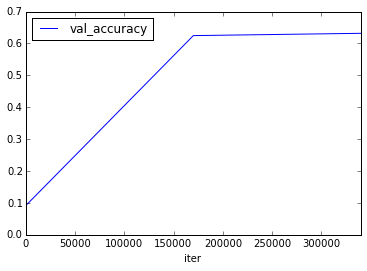

In [12]:
input_dim = len(X[0])
output_dim = len(y[0])
hl_size = 150

layer1 = neuralnet.Layer((input_dim, hl_size), t, t_prime)
layer2 = neuralnet.OutputLayer((hl_size, output_dim), g, g_prime)
nn = neuralnet.NeuralNet(layer1, layer2, cross_ent, cross_ent_prime)
nn.load_layers('layers.pkl')
nn.train(X, y, num_iters=400000, score_every=170000, eta=0.01, XVal=XVal, yVal=yVal)
print("Parameters used", nn.train_params)
nn.resulting_scores()[['val_accuracy', 'iter']].plot(x='iter')
print("Training Accuracy", nn.score(X,y)/len(X))
print("Validation Accuracy", nn.score(XVal,yVal)/len(XVal))

In [13]:
nn.cache_layers("layers.pkl")

Total Train Time 453.92 Seconds
Parameters used {'score_every': 50000, 'eta': 0.001, 'end': datetime.datetime(2015, 12, 11, 12, 54, 48, 141959), 'start': datetime.datetime(2015, 12, 11, 12, 47, 14, 217895), 'num_iters': 500000}
Training Accuracy 0.662786291956
Validation Accuracy 0.655709432976


/Users/bill_chambers/AeroFS/Dev/mlproject/walmart/neuralnet.py:120: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if XVal != None:


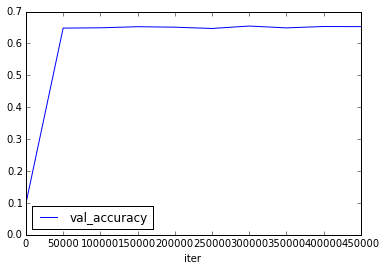

In [15]:
input_dim = len(X[0])
output_dim = len(y[0])
hl_size = 150

layer1 = neuralnet.Layer((input_dim, hl_size), t, t_prime)
layer2 = neuralnet.OutputLayer((hl_size, output_dim), g, g_prime)
nn = neuralnet.NeuralNet(layer1, layer2, cross_ent, cross_ent_prime)
nn.load_layers('layers.pkl')
nn.train(X, y, num_iters=500000, score_every=50000, eta=0.001, XVal=XVal, yVal=yVal)
print("Parameters used", nn.train_params)
nn.resulting_scores()[['val_accuracy', 'iter']].plot(x='iter')
print("Training Accuracy", nn.score(X,y)/len(X))
print("Validation Accuracy", nn.score(XVal,yVal)/len(XVal))

In [132]:
nn.cache_layers("layers.pkl")

Total Train Time 5122.32 Seconds
Parameters used {'score_every': 1000000, 'eta': 0.0001, 'num_iters': 4000000, 'start': datetime.datetime(2015, 12, 11, 7, 30, 47, 784759), 'end': datetime.datetime(2015, 12, 11, 8, 56, 10, 108774)}
Training Accuracy 0.594455114386
Validation Accuracy 0.295218186569


/Users/bill_chambers/AeroFS/Dev/mlproject/walmart/neuralnet.py:120: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if XVal != None:


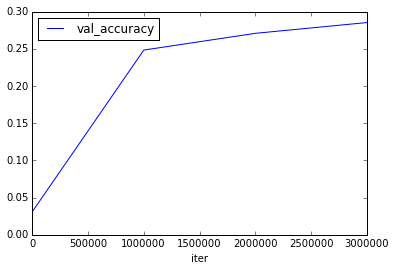

In [10]:
input_dim = len(X[0])
output_dim = len(y[0])
hl_size = 150

layer1 = neuralnet.Layer((input_dim, hl_size), t, t_prime)
layer2 = neuralnet.OutputLayer((hl_size, output_dim), g, g_prime)
nn = neuralnet.NeuralNet(layer1, layer2, cross_ent, cross_ent_prime)
nn.load_layers('layers.pkl')
nn.train(X, y, num_iters=4000000, score_every=1000000, eta=0.0001, XVal=XVal, yVal=yVal)
print("Parameters used", nn.train_params)
nn.resulting_scores()[['val_accuracy', 'iter']].plot(x='iter')
print("Training Accuracy", nn.score(X,y)/len(X))
print("Validation Accuracy", nn.score(XVal,yVal)/len(XVal))

In [11]:
nn = neuralnet.NeuralNet(layer1, layer2, cross_ent, cross_ent_prime)
nn.load_layers('layers.pkl')

In [12]:
import utils
preds = pd.Series(nn.predict(normalize(xy['X_test'].toarray()))).map(dict(enumerate(pd.get_dummies(y1).columns)))
utils.convert_predictions(pd.DataFrame({
        "VisitNumber":xy['X_test_index'],
        "TripType": preds
        })).to_csv("XY19.csv", index=False)

Missing Categories {32, 33, 34, 35, 4, 36, 37, 38, 9, 41, 43, 12, 14, 15, 18, 21, 25, 26, 29, 30}
